# Prática com Titanic

O código a seguir representa apenas uma possibilidade das diversas que existem para pré-processar o conjunto de dados e gerar as árvores de decisão. Se você pensou ou fez diferente, não tem problema, aqui estamos utilizando algumas informações sobre os dados da base para definir alguns passos de pré-processamento e criar alguns atributos preditivos extras. Mas esta é apenas uma das maneiras de tratar o problema. Assim como a escolha dos valores de hiperparâmetros para os algoritmos de aprendizado de máquina, a etapa de pré-processamento também pode influenciar na construção dos modelos e seus desempenhos preditivos. Por isso, é muito comum que métodos de pré-processamento também sejam avaliados usando validação cruzada, por exemplo. Conhecimento sobre o contexto da base e técnicas de otimização de parâmetros são amigas na hora de escolher todas as etapas de construção de um modelo. Nesta prática, ainda não usaremos nenhuma técnica de otimização de parâmetro. Num futuro próximo, vocês estrarão em contato com elas.

## Pré-processamento

Na base que vocês tiveram acesso, os valores ausentes estavam representados por '?'. Por isso, é necessário explicitar na leitura do arquivo csv, o parâmetro  `na_values`.

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import re
from scipy import stats

titanic = pd.read_csv("titanic.csv", na_values = '?')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Podemos calcular o número de valores ausentes por atributo da seguinte maneira

In [2]:
column_names = titanic.columns
for column in column_names:
    print(column + ' - ' + str(titanic[column].isnull().sum()))

pclass - 0
survived - 0
name - 0
sex - 0
age - 263
sibsp - 0
parch - 0
ticket - 0
fare - 1
cabin - 1014
embarked - 2
boat - 823
body - 1188
home.dest - 564


Apesar do atributo *cabin* apresentar muitos valores ausentes, ele pode apresentar informações relevantes. Por exemplo, a primeira letra da cabine representa o deck do navio que ela se encontra. Essa pode ser uma informação importante para saber se a pessoa sobreviveu ou não ao acidente. Então, vamos criar um novo atributo chamado *deck* extraindo a primeira letra de *cabin*. Para os valores ausentes de *cabin*, vamos indicar com o valor *0* que ele estava ausente. A ausência desse valor pode ser uma informação relevante para o modelo.

In [3]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic['cabin'] = titanic['cabin'].fillna("U0")
titanic['deck'] = titanic['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
#titanic['deck'] = titanic['deck'].map(deck)
#titanic['deck'] = titanic['deck'].fillna(0)
#titanic['deck'] = titanic['deck'].astype(int)
titanic = titanic.drop(['cabin'], axis=1)

column_names = titanic.columns
for column in column_names:
    print(column + ' - ' + str(titanic[column].isnull().sum()))

pclass - 0
survived - 0
name - 0
sex - 0
age - 263
sibsp - 0
parch - 0
ticket - 0
fare - 1
embarked - 2
boat - 823
body - 1188
home.dest - 564
deck - 0


Para o atributo idade, temos muitos valores ausentes também - em torno de 20% da base. Uma solução para os valores ausentes deste atributo é preenchê-los com um valor impossível para a idade. Isso indicaria para o algoritmo que essas idades podem ser tratadas de maneira diferente pelo modelo.

In [4]:
age_slice = titanic["age"].copy()
age_slice[np.isnan(age_slice)] = -100
titanic["age"] = age_slice
titanic["age"].isnull().sum()

0

De maneira semelhante, preenchemos os valores ausentes de *boat*, *body* e *home.dest*

In [5]:
titanic['boat'] = titanic['boat'].fillna('NAN')
titanic['body'] = titanic['body'].fillna(-100)
titanic['home.dest'] = titanic['home.dest'].fillna('NAN')

column_names = titanic.columns
for column in column_names:
    print(column + ' - ' + str(titanic[column].isnull().sum()))

pclass - 0
survived - 0
name - 0
sex - 0
age - 0
sibsp - 0
parch - 0
ticket - 0
fare - 1
embarked - 2
boat - 0
body - 0
home.dest - 0
deck - 0


Para os atributos *embarked* e *fare*, poucos valores estão ausentes. Não vale a pena criar uma categoria vazia apenas para poucos exemplos assim. Por isso decidimos preencher *embarked* com a moda e *fare* com a média. Não podemos fazer isso para a base toda pois iremos dividí-la em treinamento e teste. Dar uma informação do conjunto de teste durante o treinamento é perigoso pois você pode maquiar overfitting. Por isso, criamos a função para preeencher os valores aqui e a utilizaremos mais pra frente.

In [6]:
def preencher_fare_embarked(X_treino, X_teste=None):
    X_treino['embarked'] = X_treino['embarked'].fillna(stats.mode(X_treino['embarked'])[0][0])
    X_treino['fare'] = X_treino['fare'].fillna(X_treino['fare'].mean())
    
    # Se temos um conjunto de teste, utilizamos os dados de treino para preenchimento
    if X_teste is not None:
        X_teste['embarked'] = X_teste['embarked'].fillna(stats.mode(X_treino['embarked'])[0][0])
        X_teste['fare'] = X_teste['fare'].fillna(X_treino['fare'].mean())
    return X_treino, X_teste


Os nomes não são atributos relevantes pois são unicos. Mas eles trazem algumas informações que podem ser relevantes. Uma delas é o pronome de tratamento (ou título) da pessoa, como por exemplo, *Mr.* e *Miss*. Vamos criar um novo atributo para eles.

In [7]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

# extraindo pronomes de tratamento
titanic['title'] = titanic.name.str.extract(' ([A-Za-z]+)\.', expand=False)
# substituindo pronomes pela sua variação mais comum ou indentificando-o como raro
titanic['title'] = titanic['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

# preenchendo pronomes ausentes com 'NAN'
titanic['title'] = titanic['title'].fillna('NAN')
titanic = titanic.drop(['name'], axis=1)

O atributo *ticket* também possui muitos valores diferentes e pode não ser útil para nossa árvore. Por isso, vamos excluí-lo da base.

In [8]:
titanic = titanic.drop(['ticket'], axis=1)

In [9]:
titanic

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,deck,title
0,1,1,female,29.0000,0,0,211.3375,S,2,-100.0,"St Louis, MO",B,Miss
1,1,1,male,0.9167,1,2,151.5500,S,11,-100.0,"Montreal, PQ / Chesterville, ON",C,Master
2,1,0,female,2.0000,1,2,151.5500,S,NAN,-100.0,"Montreal, PQ / Chesterville, ON",C,Miss
3,1,0,male,30.0000,1,2,151.5500,S,NAN,135.0,"Montreal, PQ / Chesterville, ON",C,Mr
4,1,0,female,25.0000,1,2,151.5500,S,NAN,-100.0,"Montreal, PQ / Chesterville, ON",C,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C,NAN,328.0,NAN,U,Miss
1305,3,0,female,-100.0000,1,0,14.4542,C,NAN,-100.0,NAN,U,Miss
1306,3,0,male,26.5000,0,0,7.2250,C,NAN,304.0,NAN,U,Mr
1307,3,0,male,27.0000,0,0,7.2250,C,NAN,-100.0,NAN,U,Mr


Como exemplo, criaremos um árvore e visualizaremos a sua estrutura.

In [10]:
y = titanic.survived.astype(str)
X = pd.concat([titanic.iloc[:,:1], titanic.iloc[:,2:]], axis=1)

X_all = pd.get_dummies(preencher_fare_embarked(X)[0])
clf = tree.DecisionTreeClassifier()
model = clf.fit(X_all, y)
y.describe()

count     1309
unique       2
top          0
freq       809
Name: survived, dtype: object

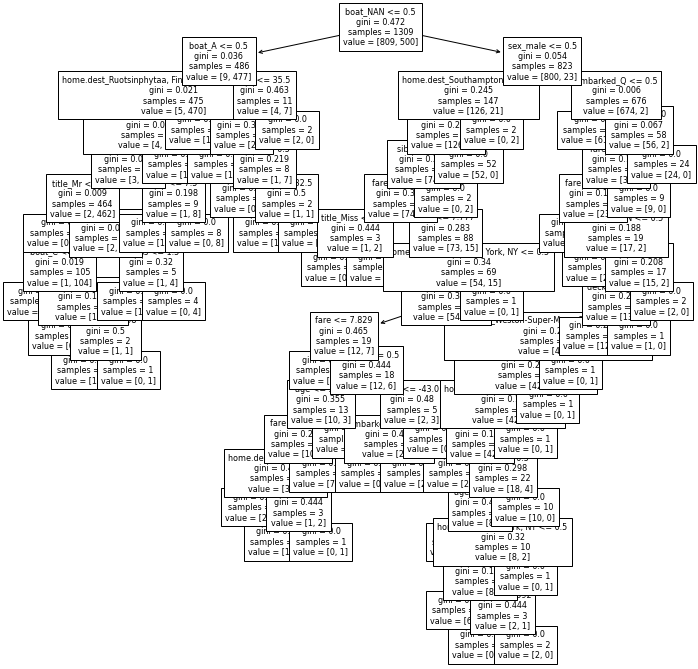

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model, fontsize=8,feature_names = X_all.columns)
plt.show()

In [12]:
import graphviz 

dot_data = tree.export_graphviz(model, out_file=None, feature_names = X_all.columns)
graph = graphviz.Source(dot_data) 
graph.render("titanic") 

'titanic.pdf'

Com base nesses passos e as informações no notebook da monitoria de árvores de decisão (e anteriores) nós já temos recursos para:

 - Particionar os dados com diferentes estratégias e avaliar o desempenho da árvore de decisão
 - Variar hiperparâmetros e fazer um grid search